In [2]:
import pandas as pd
import numpy as np
import openai
import gzip
import json

### 1. Data Loading and Preprocessing

In [3]:
file_path = 'Musical_Instruments_5.json'
reviews = []
with open(file_path, 'r') as f:
    for line in f:
        review = json.loads(line)
        reviews.append(review)

reviews_df = pd.DataFrame(reviews)
cleaned_reviews =reviews_df[['reviewText', 'overall', 'summary']].dropna()

#Display the cleaned DataFrame
print(cleaned_reviews.head())



                                          reviewText  overall  \
0  Not much to write about here, but it does exac...      5.0   
1  The product does exactly as it should and is q...      5.0   
2  The primary job of this device is to block the...      5.0   
3  Nice windscreen protects my MXL mic and preven...      5.0   
4  This pop filter is great. It looks and perform...      5.0   

                                 summary  
0                                   good  
1                                   Jake  
2                   It Does The Job Well  
3          GOOD WINDSCREEN FOR THE MONEY  
4  No more pops when I record my vocals.  


In [28]:
import re

# Remove rows with missing values in the specified columns
cleaned_reviews = cleaned_reviews.dropna(subset=['reviewText', 'overall', 'summary'])

# Convert the 'overall' field to integer type
cleaned_reviews['overall'] = cleaned_reviews['overall'].astype(int)

def clean_text(text):
    text = text.lower() 
    text = re.sub(r'[^a-z\s]', '', text) 
    return text

# Apply the clean_text function to 'reviewText' and 'summary' fields
cleaned_reviews['reviewText'] = cleaned_reviews['reviewText'].apply(clean_text)
cleaned_reviews['summary'] = cleaned_reviews['summary'].apply(clean_text)

# Display the cleaned DataFrame
print(cleaned_reviews.head())

                                          reviewText  overall  \
0  not much to write about here but it does exact...        5   
1  the product does exactly as it should and is q...        5   
2  the primary job of this device is to block the...        5   
3  nice windscreen protects my mxl mic and preven...        5   
4  this pop filter is great it looks and performs...        5   

                                summary  
0                                  good  
1                                  jake  
2                  it does the job well  
3         good windscreen for the money  
4  no more pops when i record my vocals  


### 2. Natural Language Analysis with ChatGPT

In [41]:
openai.api_key = 'sk-lKJIQUm40StsGUy2dWiKbgt56o_ToSNY-NPp1d4XnpT3BlbkFJ6TYh_TJmi8ieBFR2_3iAbsorg-7IW0Tp8jmbWSPcoA'

def query_reviews(cleaned_reviews):
    query = f"Can you categorize the following review as positive, negative or neutral? {cleaned_reviews}"
    response = openai.chat.completions.create(
        model="gpt-3.5-turbo",
        messages=[
            {"role": "user", "content": query}
        ],
        max_tokens=1000
    )

    return response.choices[0].message.content

# Query the reviews with the specified keyword
for cleaned_review in cleaned_reviews.iterrows():
    review = cleaned_review[1]['reviewText']
    response = query_reviews(review)
    print(response)
    cleaned_reviews.loc[cleaned_review[0], 'Sentiment'] = response


Positive
Positive
Positive
Neutral
Positive
Positive
positive
Negative
Positive
Positive
Positive
Neutral
Neutral
Positive
Positive
Negative
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Neutral
Neutral
Positive
Positive
Positive
Positive
Neutral
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Negative
Positive
Negative
Neutral
Positive
Positive
Negative
Positive
Positive
Neutral
Positive
Positive
Positive
Positive.
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Negative
Positive
Positive
Neutral
Positive
Negative
Neutral
Positive
Neutral
Positive
Positive
Positive
Positive
Positive
Positive
Neutral
Neutral
Positive
negative
Positive
Positive
Positive
This review can be categorized as negative.
positive
Positive
Positive
Negative
Neutral
Positive
Neutral
Positive
Positive
Negative
Neutral
Neutral
Positive
Positive
Positive


In [43]:
print(cleaned_reviews.head())

                                          reviewText  overall  \
0  not much to write about here but it does exact...        5   
1  the product does exactly as it should and is q...        5   
2  the primary job of this device is to block the...        5   
3  nice windscreen protects my mxl mic and preven...        5   
4  this pop filter is great it looks and performs...        5   

                                summary sentiment Sentiment  
0                                  good  Positive  Positive  
1                                  jake       NaN  Positive  
2                  it does the job well       NaN  Positive  
3         good windscreen for the money       NaN   Neutral  
4  no more pops when i record my vocals       NaN  Positive  


In [42]:
cleaned_reviews.to_csv('cleaned_reviews.csv', index=False)

In [44]:
pd.read_csv('cleaned_reviews.csv')



,reviewText,overall,summary,sentiment,Sentiment
0,not much to write about here but it does exact...,5,good,Positive,Positive
1,the product does exactly as it should and is q...,5,jake,NaN,Positive
2,the primary job of this device is to block the...,5,it does the job well,NaN,Positive
3,nice windscreen protects my mxl mic and preven...,5,good windscreen for the money,NaN,Neutral
4,this pop filter is great it looks and performs...,5,no more pops when i record my vocals,NaN,Positive
...,...,...,...,...,...
10256,great just as expected thank to all,5,five stars,NaN,Positive
10257,ive been thinking about trying the nanoweb str...,5,long life and for some players a good economic...,NaN,Positive
10258,i have tried coated strings in the past inclu...,4,good for coated,NaN,Neutral
10259,well made by elixir and developed with taylor ...,4,taylor made,NaN,Positive


In [45]:
cleaned_reviews = cleaned_reviews.drop(columns=['sentiment'])
print(cleaned_reviews.head())

                                          reviewText  overall  \
0  not much to write about here but it does exact...        5   
1  the product does exactly as it should and is q...        5   
2  the primary job of this device is to block the...        5   
3  nice windscreen protects my mxl mic and preven...        5   
4  this pop filter is great it looks and performs...        5   

                                summary Sentiment  
0                                  good  Positive  
1                                  jake  Positive  
2                  it does the job well  Positive  
3         good windscreen for the money   Neutral  
4  no more pops when i record my vocals  Positive  


In [58]:
def query_reviews(cleaned_reviews):
    query = f"Categorize the instruments reviewed as Guitar, Bass, Piano,Midi Controller, Accessories, Others {cleaned_reviews}"
    response = openai.chat.completions.create(
        model="gpt-3.5-turbo",
        messages=[
            {"role": "user", "content": query}
        ],
        max_tokens=1000
    )

    return response.choices[0].message.content

# Query the reviews with the specified keyword
for cleaned_review in cleaned_reviews.iterrows():
    review = cleaned_review[1]['reviewText']
    response = query_reviews(review)
    print(response)
    cleaned_reviews.loc[cleaned_review[0], 'Common Instruments'] = response

Accessories
Accessories
Accessories
Accessories
Accessories
Accessories
Accessories
Accessories
Guitar, Accessories
Accessories
Accessories
Piano
Accessories, Piano
Accessories
Midi Controller
Accessories
Accessories
Accessories
Accessories
Accessories
Accessories
Accessories
Accessories
Accessories
Accessories
Accessories
Accessories
Accessories
Accessories
Accessories
Accessories
Accessories
Accessories
Accessories
- Accessories (XLR microphone cords)
Accessories
Accessories
Accessories
Accessories
Accessories
Accessories
- Guitar: includes electric guitars and acoustic guitars
- Bass: includes electric bass guitars
- Piano: includes acoustic pianos and digital pianos
- Midi Controller: includes MIDI keyboards and MIDI pad controllers
- Accessories: includes guitar strings, guitar picks, guitar straps, etc.
- Others: instruments that do not fit into the above categories, such as synthesizers, drum machines, etc.
Accessories
Accessories
Accessories
Accessories
Accessories - this produ

In [56]:
cleaned_reviews = cleaned_reviews.drop(columns=['Common Instruments'])
print(cleaned_reviews.head())

                                          reviewText  overall  \
0  not much to write about here but it does exact...        5   
1  the product does exactly as it should and is q...        5   
2  the primary job of this device is to block the...        5   
3  nice windscreen protects my mxl mic and preven...        5   
4  this pop filter is great it looks and performs...        5   

                                summary Sentiment  
0                                  good  Positive  
1                                  jake  Positive  
2                  it does the job well  Positive  
3         good windscreen for the money   Neutral  
4  no more pops when i record my vocals  Positive  


In [59]:
print(cleaned_reviews.head())

                                          reviewText  overall  \
0  not much to write about here but it does exact...        5   
1  the product does exactly as it should and is q...        5   
2  the primary job of this device is to block the...        5   
3  nice windscreen protects my mxl mic and preven...        5   
4  this pop filter is great it looks and performs...        5   

                                summary Sentiment Common Instruments  
0                                  good  Positive        Accessories  
1                                  jake  Positive        Accessories  
2                  it does the job well  Positive        Accessories  
3         good windscreen for the money   Neutral        Accessories  
4  no more pops when i record my vocals  Positive        Accessories  


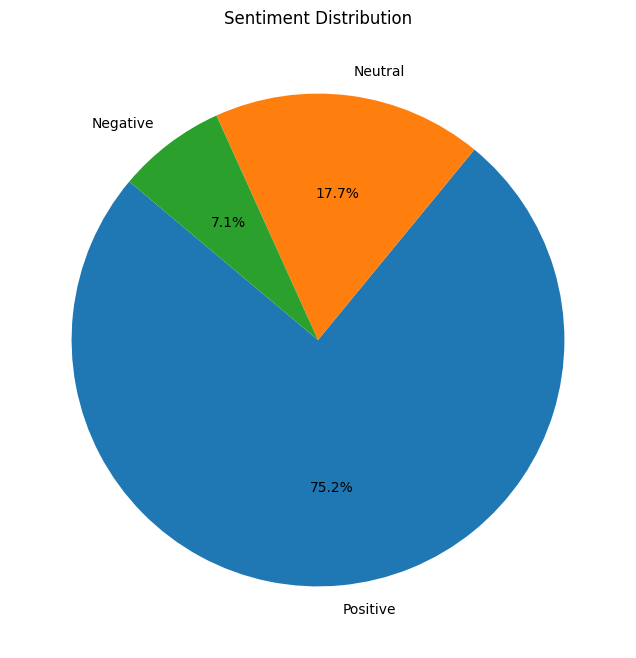

In [66]:
import seaborn as sns

import matplotlib.pyplot as plt

# Pie chart for sentiment distribution
sentiment_counts = cleaned_reviews['Sentiment'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Sentiment Distribution')
plt.show()

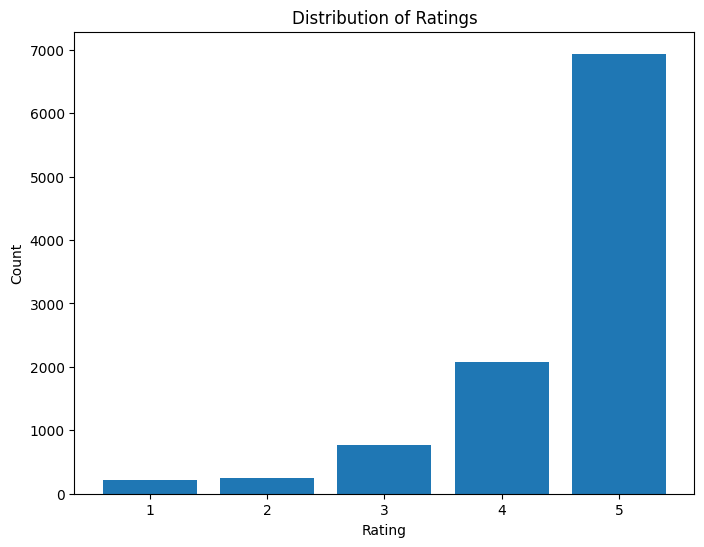

In [63]:
ratings = cleaned_reviews['overall'].value_counts().sort_index()
plt.figure(figsize=(8, 6))
plt.bar(ratings.index, ratings.values)
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.xticks(ratings.index)
plt.show()

In [65]:
sentiment_mapping = {
    'Positive': 'Positive',
    'positive': 'Positive',
    'Neutral': 'Neutral',
    'Negative': 'Negative',
    'This review can be categorized as positive.': 'Positive',
    'The review can be categorized as neutral. While the reviewer highlights the product\'s effectiveness and gives it a rating of four stars, they also mention a minor annoyance regarding the capo\'s ability to stay on the head of the guitar. This mixed feedback results in a neutral overall tone.': 'Neutral',
    'Positive sentiment': 'Positive',
    'The review seems to be a mix of positive and negative points, but overall it leans towards negative. The positive aspect is that the user likes that they can insert more than one pick and that they stay secure. However, the negative aspect is that the original glue was not strong enough and the holder fell to the ground.': 'Negative',
    'The review is a mix of positive and negative feedback. It can be categorized as neutral.': 'Neutral',
    'Overall, this review can be categorized as neutral. The reviewer mentions both positive and negative aspects of the product, without conveying a strong overall opinion.': 'Neutral'
}

# Apply the mapping to the Sentiment column
cleaned_reviews['Sentiment'] = cleaned_reviews['Sentiment'].map(sentiment_mapping).fillna('Neutral')

# Display the refined DataFrame
print(cleaned_reviews['Sentiment'].value_counts())
print(cleaned_reviews.head())

Sentiment
Positive    7713
Neutral     1817
Negative     731
Name: count, dtype: int64
                                          reviewText  overall  \
0  not much to write about here but it does exact...        5   
1  the product does exactly as it should and is q...        5   
2  the primary job of this device is to block the...        5   
3  nice windscreen protects my mxl mic and preven...        5   
4  this pop filter is great it looks and performs...        5   

                                summary Sentiment Common Instruments  
0                                  good  Positive        Accessories  
1                                  jake  Positive        Accessories  
2                  it does the job well  Positive        Accessories  
3         good windscreen for the money   Neutral        Accessories  
4  no more pops when i record my vocals  Positive        Accessories  


### Summary of Analysis Results

The analysis of the musical instrument reviews dataset reveals several key insights:

1. **Overall Sentiment Distribution**:
    - **Positive**: The majority of the reviews are positive, with 7,713 reviews categorized as positive.
    - **Neutral**: There are 1,817 reviews categorized as neutral.
    - **Negative**: A smaller portion, 731 reviews, are categorized as negative.

2. **Common Feedback Themes**:
    - **Quality and Performance**: Many reviews highlight the quality and performance of the products. Positive reviews often mention the durability and effectiveness of the instruments and accessories.
    - **Value for Money**: Several reviews appreciate the value for money, indicating that the products are worth their price.
    - **Specific Features**: Reviews frequently discuss specific features of the products, such as sound quality for strings and cables, or the build quality of accessories.
    - **Comparisons with Other Products**: Some reviews compare the products with other brands or models, often highlighting the superior or inferior aspects.

3. **Sentiment Mapping**:
    - The sentiment mapping process refined the sentiment categories, ensuring consistency in the classification of reviews.

Overall, the dataset indicates a generally positive reception of the musical instruments and accessories, with specific praise for quality, performance, and value for money. Negative feedback, while present, is less common and often focuses on specific issues or comparisons with other products.